<h1 align=center>Capítulo 3 - Recursos linguísticos</h1>
<p align=center><img src=https://www.programaria.org/wp-content/uploads/2020/04/914.png width=500></p>

Este capítulo é um mergulho profundo em todo o poder do spaCy. Você descobrirá os recursos linguísticos, incluindo os recursos mais usados do spaCy, como o **tagger de parte da fala (POS)**, o **analisador de dependência**, o **reconhecedor de entidade nomeado** e os **recursos de mesclagem/divisão**.

Primeiro, você aprenderá o conceito de **tag POS**, como funciona o tagger spaCy POS e como colocar tags POS em seus aplicativos de **compreensão de linguagem natural (NLU)**. A seguir, você aprenderá uma maneira estruturada de representar a sintaxe da frase por meio do analisador de dependência. Você aprenderá sobre os rótulos de dependência do spaCy e como interpretar os resultados do rotulador de dependência spaCy com exemplos reveladores. Em seguida, você aprenderá um conceito NLU muito importante que está no centro de muitos aplicativos de **processamento de linguagem natural (NLP)** — chamado de **reconhecimento de entidade (NER)**. Veremos exemplos de como extrair informações do texto usando NER. Por fim, você aprenderá a mesclar/dividir as entidades extraídas.

Neste capítulo, abordaremos os seguintes tópicos principais:
* O que é marcação POS?
* Introdução à análise de dependência
* Apresentando o NER
* Mesclando e dividindo tokens

## O que é marcação POS?

Vimos os termos *tag PO*S e *tagging POS* brevemente no capítulo anterior, enquanto discutimos os recursos da classe spaCy **Token**. Como é óbvio pelo nome, eles se referem ao processo de marcação de tokens com tags POS. Uma pergunta permanece aqui: *O que é uma tag POS?* Nesta seção, descobriremos em detalhes o conceito de *POS* e como aproveitá-lo ao máximo em nossos aplicativos de NLP.

O acrônimo de marcação de **POS tagging** se expande como marcação de **parte da fala**. Uma **parte do discurso** é uma categoria sintática na qual cada palavra se enquadra em uma categoria de acordo com sua função em uma frase. Por exemplo, o inglês tem nove categorias principais: verbo, substantivo, pronome, determinante, adjetivo, advérbio, preposição, conjunção e interjeição. Podemos descrever as funções de cada categoria da seguinte forma:

* **Verbo**: Expressa uma ação ou um estado de ser
* **Substantivo**: Identifica uma pessoa, um lugar ou uma coisa, ou nomeia um deles em particular (um nome próprio)
* **Pronome**: pode substituir um substantivo ou frase nominal
* **Determinador**: é colocado na frente de um substantivo para expressar uma quantidade ou esclarecer a que o substantivo se refere - resumidamente, um introdutor de substantivo
* **Adjetivo**: Modifica um substantivo ou um pronome
* **Advérbio**: Modifica um verbo, um adjetivo ou outro advérbio
* **Preposição**: conecta um substantivo/pronome a outras partes da frase
* **Conjunção**: Cola palavras, orações e frases juntas
* **Interjeição**: Expressa emoção de forma repentina e exclamativa

Esse conjunto central de categorias, sem nenhuma característica morfológica ou sintática específica do idioma, é chamado de **tags universais**. spaCy captura tags universais por meio do recurso **pos_** e as descreve com exemplos, como segue:

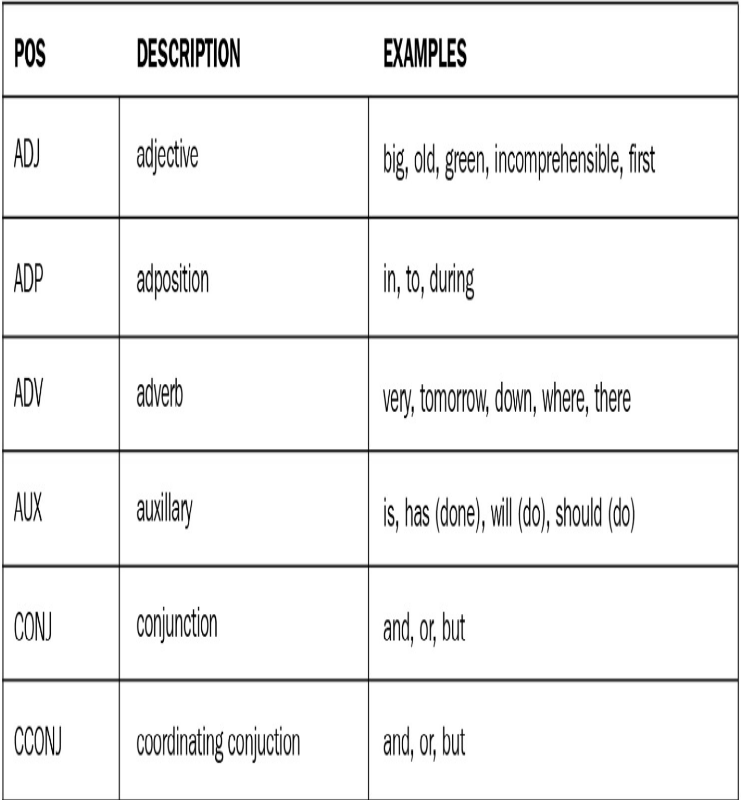

In [2]:
from IPython.display import Image
Image('images/tag_explained.PNG', width=500)

Ao longo do livro, fornecemos exemplos com o idioma inglês e, portanto, nesta seção, nos concentraremos no inglês. Diferentes idiomas oferecem diferentes conjuntos de tags, e spaCy suporta diferentes conjuntos de tags via **tag_map.py** em cada submódulo de idioma. Por exemplo, o conjunto de tags em inglês atual está em **lang/en/tag_map.py** e o conjunto de tags em alemão fica em **lang/de/tag_map.py**. Além disso, o mesmo idioma pode suportar diferentes conjuntos de tags; por esta razão, spaCy e outras bibliotecas de NLP sempre especificam qual conjunto de tags elas usam. O tagger POS spaCy English usa o conjunto de tags **Ontonotes 5** e o tagger POS alemão usa o conjunto de tags **TIGER Treebank**.

Cada idioma suportado do spaCy admite seu próprio conjunto de tags e esquema de tagging refinado, um esquema de tagging específico que geralmente cobre características morfológicas, tempos e aspectos dos verbos, número de substantivos (singular/plural), informações de pessoa e número de pronomes (primeiro-,segunda-, terceira-pessoa do singular/plural), tipo de pronome (pessoal, demonstrativo, interrogativo), tipo de adjetivo (comparativo ou superlativo) e assim por diante.

O spaCy oferece suporte a tags POS de granulação fina para atender às necessidades específicas do idioma, e o recurso **tag_** corresponde às tags de granulação fina. A captura de tela a seguir nos mostra uma parte dessas tags POS refinadas e seus mapeamentos para tags POS mais universais para inglês:

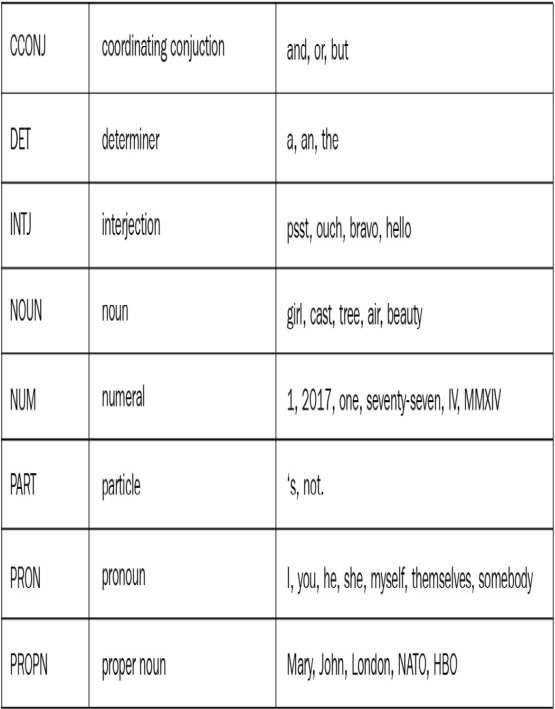

In [3]:
Image('images/english_tags.PNG', width=500)

Não se preocupe se você nunca trabalhou com tags POS antes, pois você se familiarizará praticando com a ajuda de nossos exemplos. Sempre incluiremos explicações das tags que usamos. Você também pode chamar **spacy.explain()** nas tags. Geralmente chamamos **spacy.explain()** de duas maneiras, diretamente na string do nome da tag ou com **token.tag_**, conforme ilustrado no trecho de código a seguir:

In [4]:
import spacy
spacy.explain('NNS')

'noun, plural'

In [5]:
nlp = spacy.load('en_core_web_md')
doc = nlp('I saw flowers.')
token = doc[2]
print('{} - {} - {}'.format(token.text,token.tag_,spacy.explain(token.tag_)))

flowers - NNS - noun, plural


Se você quiser saber mais sobre POS, você pode ler mais sobre ele em dois excelentes recursos: *Part of Speech em http://partofspeech.org/* e *Eight Parts of Speech em http://www.butte.edu/ departamentos/cas/tipsheets/grammar/parts_of_speech.html*.

Como você pode ver, a marcação POS oferece uma compreensão sintática muito básica da frase. As tags POS são usadas extensivamente na NLU; frequentemente queremos encontrar os verbos e os substantivos em uma frase e desambiguar melhor algumas palavras por seus significados (mais sobre este assunto em breve).

Cada palavra é marcada por uma tag POS dependendo de seu contexto - as outras palavras ao redor e suas tags POS. Tags POS são modelos estatísticos sequenciais, o que significa que uma tag de uma palavra depende dos *tokens vizinhos da palavra, suas tags e a própria palavra*. A marcação POS sempre foi feita de diferentes formas. O aprendizado de **sequência a sequência (Seq2seq)** começou com **Hidden Markov Models (HMMs)** nos primeiros dias e evoluiu para modelos de rede neural – normalmente, **variações de memória de longo prazo (LSTM)** (spaCy também usa uma variação LSTM). Você pode testemunhar a evolução da marcação POS de última geração no site da ACL (https://aclweb.org/aclwiki/POS_Tagging_(State_of_the_art)).

É hora de algum código agora. Novamente, spaCy oferece tags POS universais por meio dos recursos **token.pos (int)** e **token.pos_ (unicode)**. As tags POS refinadas estão disponíveis por meio dos recursos **token.tag (int)** e **token.tag_ (unicode)**.

Vamos aprender mais sobre as tags que você mais encontrará, por meio de alguns exemplos. O exemplo a seguir inclui exemplos de tags de substantivo, nome próprio, pronome e verbo:

In [6]:
doc = nlp('Alicia and me went to the school by bus.')
for token in doc:
	print(f"{token.text}  ====  {token.pos_} ==== {token.tag_} ==== {spacy.explain(token.pos_)} ==== {spacy.explain(token.tag_)}")

Alicia  ====  PROPN ==== NNP ==== proper noun ==== noun, proper singular
and  ====  CCONJ ==== CC ==== coordinating conjunction ==== conjunction, coordinating
me  ====  PRON ==== PRP ==== pronoun ==== pronoun, personal
went  ====  VERB ==== VBD ==== verb ==== verb, past tense
to  ====  ADP ==== IN ==== adposition ==== conjunction, subordinating or preposition
the  ====  DET ==== DT ==== determiner ==== determiner
school  ====  NOUN ==== NN ==== noun ==== noun, singular or mass
by  ====  ADP ==== IN ==== adposition ==== conjunction, subordinating or preposition
bus  ====  NOUN ==== NN ==== noun ==== noun, singular or mass
.  ====  PUNCT ==== . ==== punctuation ==== punctuation mark, sentence closer


Nós iteramos sobre os tokens e imprimimos o texto dos tokens, a tag universal e a tag refinada, juntamente com as explicações, que são descritas aqui:
* Alicia é um nome próprio, como esperado, e NNP é uma tag para nomes próprios.
* me é um pronome e bus é um substantivo. NN é uma tag para substantivos singulares e
* PRP é uma tag de pronome pessoal.
* As tags verbais começam com V. Aqui, VBD é uma tag para go, que é um verbo no passado.

Agora, considere a seguinte frase:

In [7]:
doc = nlp("My friend will fly to New York fast and she is staying there for 3 days.")
for token in doc:
    print(f"{token.text}  ====  {token.pos_} ==== {token.tag_} ==== {spacy.explain(token.pos_)} ==== {spacy.explain(token.tag_)}")

My  ====  PRON ==== PRP$ ==== pronoun ==== pronoun, possessive
friend  ====  NOUN ==== NN ==== noun ==== noun, singular or mass
will  ====  AUX ==== MD ==== auxiliary ==== verb, modal auxiliary
fly  ====  VERB ==== VB ==== verb ==== verb, base form
to  ====  ADP ==== IN ==== adposition ==== conjunction, subordinating or preposition
New  ====  PROPN ==== NNP ==== proper noun ==== noun, proper singular
York  ====  PROPN ==== NNP ==== proper noun ==== noun, proper singular
fast  ====  ADV ==== RB ==== adverb ==== adverb
and  ====  CCONJ ==== CC ==== coordinating conjunction ==== conjunction, coordinating
she  ====  PRON ==== PRP ==== pronoun ==== pronoun, personal
is  ====  AUX ==== VBZ ==== auxiliary ==== verb, 3rd person singular present
staying  ====  VERB ==== VBG ==== verb ==== verb, gerund or present participle
there  ====  ADV ==== RB ==== adverb ==== adverb
for  ====  ADP ==== IN ==== adposition ==== conjunction, subordinating or preposition
3  ====  NUM ==== CD ==== numeral ==== 

Vamos começar com os verbos. Como apontamos no primeiro exemplo, as tags verbais começam com V. Aqui, existem três verbos, como segue:
* fly: a base form
* staying: an -ing form
* is: an auxiliary verb

As tags correspondentes são **VB**, **VBG** e **VBZ**.

Outro detalhe é que tanto **New** quanto **York** são marcados como nomes próprios. Se um nome próprio consiste em vários tokens, todos os tokens admitem a tag **NNP**. **My** é um pronome possessivo e é marcado como **PRP$**, em contraste com o pronome pessoal anterior **me** e sua **tag PRP**.

Vamos continuar com uma palavra que pode ser um verbo ou um substantivo, dependendo do contexto: **ship**. Na frase a seguir, **ship** é usado como um verbo:

In [8]:
doc = nlp("I will ship the package tomorrow.")
for token in doc:
    print(f"{token.text}  ====  {token.pos_} ==== {token.tag_} ==== {spacy.explain(token.pos_)} ==== {spacy.explain(token.tag_)}")

I  ====  PRON ==== PRP ==== pronoun ==== pronoun, personal
will  ====  AUX ==== MD ==== auxiliary ==== verb, modal auxiliary
ship  ====  VERB ==== VB ==== verb ==== verb, base form
the  ====  DET ==== DT ==== determiner ==== determiner
package  ====  NOUN ==== NN ==== noun ==== noun, singular or mass
tomorrow  ====  NOUN ==== NN ==== noun ==== noun, singular or mass
.  ====  PUNCT ==== . ==== punctuation ==== punctuation mark, sentence closer


Aqui, **ship** é marcado como um verbo, como esperávamos. Nossa próxima frase também contém a palavra **ship**, mas como um substantivo. Agora, o tagger spaCy pode marcá-lo corretamente? Dê uma olhada no trecho de código a seguir para descobrir:

In [9]:
doc = nlp("I saw a red ship.")
for token in doc:
    print(f"{token.text}  ====  {token.pos_} ==== {token.tag_} ==== {spacy.explain(token.pos_)} ==== {spacy.explain(token.tag_)}")

I  ====  PRON ==== PRP ==== pronoun ==== pronoun, personal
saw  ====  VERB ==== VBD ==== verb ==== verb, past tense
a  ====  DET ==== DT ==== determiner ==== determiner
red  ====  ADJ ==== JJ ==== adjective ==== adjective (English), other noun-modifier (Chinese)
ship  ====  NOUN ==== NN ==== noun ==== noun, singular or mass
.  ====  PUNCT ==== . ==== punctuation ==== punctuation mark, sentence closer


E voilà! Desta vez, a palavra **ship** agora está marcada como um substantivo, como queríamos ver. O *tagger* olhou para as palavras ao redor; aqui, **ship** é usado com um determinante e um adjetivo, e spaCy deduziu que deveria ser um substantivo.

Que tal esta frase complicada:

In [10]:
doc = nlp("My cat will fish for a fish tomorrow in a fishy way.")
for token in doc:
    print(f"{token.text}  ====  {token.pos_} ==== {token.tag_} ==== {spacy.explain(token.pos_)} ==== {spacy.explain(token.tag_)}")

My  ====  PRON ==== PRP$ ==== pronoun ==== pronoun, possessive
cat  ====  NOUN ==== NN ==== noun ==== noun, singular or mass
will  ====  AUX ==== MD ==== auxiliary ==== verb, modal auxiliary
fish  ====  VERB ==== VB ==== verb ==== verb, base form
for  ====  ADP ==== IN ==== adposition ==== conjunction, subordinating or preposition
a  ====  DET ==== DT ==== determiner ==== determiner
fish  ====  NOUN ==== NN ==== noun ==== noun, singular or mass
tomorrow  ====  NOUN ==== NN ==== noun ==== noun, singular or mass
in  ====  ADP ==== IN ==== adposition ==== conjunction, subordinating or preposition
a  ====  DET ==== DT ==== determiner ==== determiner
fishy  ====  ADJ ==== JJ ==== adjective ==== adjective (English), other noun-modifier (Chinese)
way  ====  NOUN ==== NN ==== noun ==== noun, singular or mass
.  ====  PUNCT ==== . ==== punctuation ==== punctuation mark, sentence closer


Queríamos enganar o tagger com os diferentes usos da palavra **fish**, mas o tagger é inteligente o suficiente para distinguir o verbo **fish**, o substantivo **fish** e o adjetivo **fishy**. Aqui está como ele fez isso:
* Em primeiro lugar, **fish** vem logo após o verbo modal **will**, então o tagger o reconheceu como um verbo.
* Em segundo lugar, **fish** serve como objeto da sentença e é qualificado por um determinante; a tag é provavelmente um substantivo.
* Finalmente, **fishy** termina em **y** e vem antes de um substantivo na frase, então é claramente um adjetivo.

O tagger spaCy fez um trabalho muito tranquilo aqui ao prever uma frase complicada. Após exemplos de marcação muito precisa, apenas uma pergunta fica em nossas mentes: *Por que precisamos das tags POS?*

Qual é a importância das tags POS no NLU e por que precisamos distinguir a classe das palavras de qualquer maneira? A resposta é simples: muitos aplicativos precisam saber o tipo de palavra para melhor precisão. Considere os sistemas de tradução automática para um exemplo disso: as palavras para fish (V) e fish (N) correspondem a palavras diferentes em espanhol, conforme ilustrado no seguinte trecho de código:
~~~python
I will fish/VB tomorrow. -> Pescaré/V mañana.
I eat fish/NN. -> Como pescado/N.
~~~
As informações sintáticas podem ser usadas em muitas tarefas NLU, e alguns truques de POS podem ajudar muito seu código NLU. Vamos continuar com um problema tradicional:  **word-sense disambiguation** (desambiguação de sentido de palavras) (WSD), e como resolvê-lo com a ajuda do spaCy tagger.

### WSD
WSD é um problema clássico de NLU de decidir em que sentido uma palavra em particular é usada em uma frase. Uma palavra pode ter muitos sentidos – por exemplo, considere a palavra *Bass*. Aqui estão alguns sentidos que podemos pensar:
* Bass — robalo, peixe (noun (N))
* Bass — voz masculina mais baixa (N)
* Bass — cantor masculino com extensão de voz mais baixa (N)

Determinar o sentido da palavra pode ser crucial em mecanismos de busca, tradução automática e sistemas de resposta a perguntas. Para o exemplo anterior, *bass*, um tagger POS infelizmente não ajuda muito, pois o tagger rotula todos os sentidos com uma tag de substantivo. Precisamos de mais do que um tagger POS. Que tal a palavra *beat*? Vamos dar uma olhada nisso aqui:
* Beat – bater violentamente (verbo (V))
* Beat — para derrotar alguém em um jogo ou competição (V)
* Beat — ritmo na música ou poesia (N)
* Beat — movimento de asa de pássaro (N)
* Beat — completamente exausto (adjetivo (ADJ))

Aqui, a marcação POS pode ajudar muito. A tag **ADJ** determina definitivamente o sentido da palavra; se a palavra *beat* estiver marcada como **ADJ**, identifica o sentido completamente esgotado. Isso não é verdade para as tags **V** e **N** aqui; se a palavra *beat* for rotulada com uma etiqueta **V**, seu sentido pode ser *atacar violentamente ou derrotar outra pessoa*. WSD é um problema aberto, e muitos modelos estatísticos complicados são propostos. No entanto, se você precisar de um protótipo rápido, poderá resolver esse problema em alguns casos (como no exemplo anterior) com a ajuda do spaCy tagger.

### Tempo verbal e aspecto em aplicações NLU

No capítulo anterior, usamos o exemplo do aplicativo de agência de viagens onde obtivemos as formas base (que são livres de tempo verbal e aspecto) dos verbos usando lematização. Nesta subseção, vamos nos concentrar em como usar o tempo verbal e as informações de aspecto que perdemos durante o processo de lematização.

**Tempo verbal** e **aspecto** são talvez as informações mais interessantes que os verbos nos fornecem, nos dizendo quando a ação aconteceu no tempo e se a ação do verbo está terminada ou em andamento. Tempo e aspecto juntos indicam a referência de um verbo ao tempo atual. O inglês tem três tempos básicos: passado, presente e futuro. Um tempo verbal é acompanhado por aspectos simples, progressivos/contínuos ou perfeitos. Por exemplo, na frase *I'm eating*, a ação comer acontece no presente e está em andamento, portanto, descreve este verbo como presente progressivo/contínuo. Até agora tudo bem. Então, como usamos essas informações em nossa agência de viagens NLU? Considere as seguintes frases de clientes que podem ser direcionadas ao nosso aplicativo NLU:
~~~python
I flew to Rome.
I have flown to Rome.
I'm flying to Rome.
I need to fly to Rome.
I will fly to Rome.
~~~

Em todas as frases, a ação é *to fly*: no entanto, apenas algumas frases afirmam a intenção de fazer uma reserva de passagem. Vamos imaginar essas frases com um contexto circundante, como segue:
~~~python
I flew to Rome 3 days ago. I still didn't get the bill, please send it ASAP.
I have flown to Rome this morning and forgot my laptop on the airplane. Can you please connect me to lost and found?
I'm flying to Rome next week. Can you check flight availability?
I need to fly to Rome. Can you check flights on next Tuesday?
I will fly to Rome next week. Can you check the flights?
~~~

De relance, as formas passadas e perfeitas do verbo *fly* não indicam uma intenção de reserva. Em vez disso, eles direcionam para uma reclamação do cliente ou problemas de atendimento ao cliente. As formas progressivas infinitivo e presente, por outro lado, apontam para a intenção de reserva. Vamos marcar e lematizar os verbos com o seguinte segmento de código:

In [11]:
sent1 = "I flew to Rome."
sent2 = "I'm flying to Rome."
sent3 = "I will fly to Rome."

doc1 = nlp(sent1)
doc2 = nlp(sent2)
doc3 = nlp(sent3)

for doc in [doc1, doc2, doc3]:
    print([(w.text, w.lemma_) for w in doc if w.tag_== 'VBG' or w.tag_== 'VB'])


[]
[('flying', 'fly')]
[('fly', 'fly')]


Nós iteramos três objetos **doc** um por um, e para cada sentença verificamos se a tag refinada do token é **VBG** (um verbo na forma progressiva presente) ou **VB** (um verbo na forma base/infinitivo). Basicamente, filtramos os verbos progressivos e infinitivos presentes. Você pode pensar nesse processo como uma representação semântica do verbo na forma de [**word form** (forma de palavra), **lemma**, **tag**], conforme ilustrado no trecho de código a seguir:
~~~python
flying: (fly, VBG)
~~~

Cobrimos uma tarefa semântica e uma morfológica - WSD e tempo/aspecto dos verbos. Continuaremos com um assunto complicado: como tirar o melhor proveito de algumas tags especiais, ou seja, tags de número, símbolo e pontuação.

### Noções básicas sobre tags de número, símbolo e pontuação

Se você observar o POS em inglês, notará as tags **NUM**, **SYM** e **PUNCT**. Essas são as tags para números, símbolos e pontuação, respectivamente. Essas categorias são divididas em categorias refinadas: **$**, **SYM**, **''**, **-LRB-** e **-RRB-**. Eles são mostrados na captura de tela a seguir:

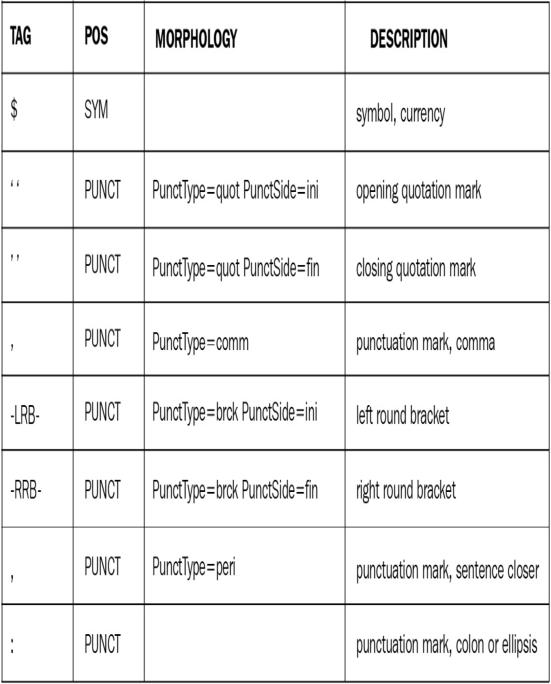

In [12]:
Image('images/tag_punctuation.PNG')

Vamos marcar algumas frases de exemplo que contêm números e símbolos, como segue:

In [13]:
doc = nlp("He earned $5.5 million in 2020 and paid %35 tax.")
for token in doc:
    print(f"{token.text}  ==== {token.tag_}  ==== {spacy.explain(token.tag_)}")

He  ==== PRP  ==== pronoun, personal
earned  ==== VBD  ==== verb, past tense
$  ==== $  ==== symbol, currency
5.5  ==== CD  ==== cardinal number
million  ==== CD  ==== cardinal number
in  ==== IN  ==== conjunction, subordinating or preposition
2020  ==== CD  ==== cardinal number
and  ==== CC  ==== conjunction, coordinating
paid  ==== VBD  ==== verb, past tense
%  ==== NN  ==== noun, singular or mass
35  ==== CD  ==== cardinal number
tax  ==== NN  ==== noun, singular or mass
.  ==== .  ==== punctuation mark, sentence closer


Novamente iteramos sobre os tokens e imprimimos as tags refinadas. O tagger foi capaz de distinguir símbolos, sinais de pontuação e números. Até a palavra **million** também é reconhecida como um número!

Agora, o que fazer com as tags de símbolo? Símbolos e números de moeda oferecem uma maneira de extrair sistematicamente descrições de dinheiro e são muito úteis em textos financeiros, como relatórios financeiros.

## Introdução à análise de dependência (Dependency Parsing)

Se você já está familiarizado com spaCy, deve ter encontrado o analisador de dependência spaCy. Embora muitos desenvolvedores vejam o analisador de dependência na documentação do spaCy, eles têm vergonha de usá-lo ou não sabem como usar esse recurso ao máximo. Nesta parte, você explorará uma maneira sistemática de representar sintaticamente uma frase. Vamos começar com o que a análise de dependência realmente é.

### O que é análise de dependência?

Na seção anterior, focamos nas tags POS—categorias sintáticas de palavras. Embora as tags POS também forneçam informações sobre as tags das palavras vizinhas, elas não revelam nenhuma relação entre palavras que não são vizinhas na frase dada.

Nesta seção, vamos nos concentrar na análise de dependência — uma maneira mais estruturada de explorar a sintaxe da frase. Como o nome sugere, a **análise de dependência** está relacionada à análise de estruturas de sentença por meio de dependências entre os tokens. Um **analisador de dependência** marca relações sintáticas entre tokens da sentença e conecta pares de tokens sintaticamente relacionados. Uma **dependência** ou uma r**elação de dependência** é um *link direcionado* entre dois tokens.

O resultado da análise de dependência é sempre uma **tree** (árvore), conforme ilustrado na captura de tela a seguir:

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0d/Wearetryingtounderstandthedifference_%282%29.jpg">

### Relações de dependência

Qual é a utilidade das relações de dependência, então? Muitos métodos estatísticos em NLP giram em torno de representações vetoriais de palavras e tratam uma sentença como uma sequência de palavras. Como você pode ver na figura anterior, uma sentença é mais do que uma sequência de tokens — ela tem uma estrutura; cada palavra em uma frase tem um papel bem definido, como verbo, sujeito, objeto e assim por diante; portanto, as sentenças definitivamente têm uma estrutura. Essa estrutura é usada extensivamente em chatbots, resposta a perguntas e tradução automática. A aplicação mais útil que vem à mente é determinar o objeto e o sujeito da frase. Novamente, vamos voltar ao nosso aplicativo de agência de viagens. Imagine que um cliente está reclamando do serviço. Compare as duas frases, **I forwarded you the email**  e **You forwarded me the email**; se eliminarmos as palavras irrelevantes **I**, **you**, **me** e **the**, resta o seguinte:
~~~python
I forwarded you the email. -> forwarded email
You forwarded me the email. -> forwarded email
~~~

Embora as partes restantes das frases sejam idênticas, as frases têm significados muito diferentes e exigem respostas diferentes. Na primeira frase, o sujeito da frase é **I** (então, a resposta provavelmente começará com você) e o sujeito da segunda frase é **you** (que terminará em uma resposta **I**).

Obviamente, o analisador de dependências nos ajuda a aprofundar a sintaxe e a semântica das frases. Vamos explorar mais, começando pelas relações de dependência.

### Relações sintáticas
spaCy atribui a cada token um rótulo de dependência, assim como outros recursos linguísticos, como um **lemma** ou uma **tag POS**. spaCy mostra relações de dependência com *arcos direcionados*. A captura de tela a seguir mostra um exemplo de relação de dependência entre um substantivo e o adjetivo que qualifica o substantivo:

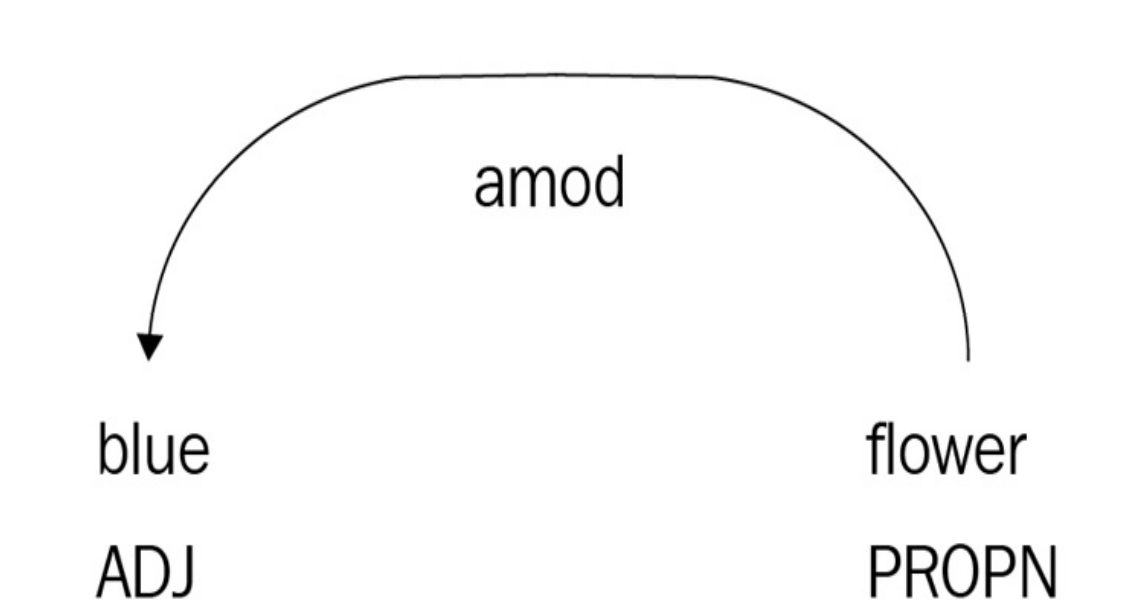

In [20]:
Image('images/dependency_relation.PNG', width=500)

Um rótulo de dependência descreve o tipo de relação sintática entre dois tokens da seguinte forma: um dos tokens é o **pai sintático** (chamado de **HEAD**) e o outro é seu **dependente** (chamado de **CHILD**). No exemplo anterior, **flower** é a **HEAD** e **blue** é seu *dependente/filho*.

O rótulo de dependência é atribuído ao filho. Objetos de token têm propriedades **dep(int)** e **dep_(unicode)** que contêm o rótulo de dependência, conforme ilustrado no trecho de código a seguir:

In [25]:
doc = nlp('blue flower')
for token in doc:
	print(f"TOKEN TEX: {token.text} === TOKEN DEP: {token.dep_}" )

TOKEN TEX: blue === TOKEN DEP: compound
TOKEN TEX: flower === TOKEN DEP: ROOT


Neste exemplo, iteramos sobre os tokens e imprimimos seu texto e rótulo de dependência. Vamos repassar o que aconteceu pouco a pouco, da seguinte forma:

* **blue** admitiu o selo **compound**. **compound | amod** é o rótulo de dependência para uma relação adjetivo-substantivo.
* **flower** é a **ROOT**. ROOT é um rótulo especial na árvore de dependência; é atribuído ao verbo principal de uma frase. Se estivermos processando uma frase (não uma frase completa), o rótulo ROOT será atribuído à raiz da frase, que é o substantivo principal da frase. Na frase **blue flower**, o substantivo principal, **flower**, é a raiz da frase.
* Cada sentença/frase tem exatamente uma raiz, e é a raiz da árvore de análise (lembre-se, o resultado da análise de dependência é uma árvore).
* Os nós de árvore podem ter mais de um filho, mas cada nó pode ter apenas um pai (devido a restrições de árvore e árvores que não contêm ciclos). Em outras palavras, cada token tem exatamente uma cabeça, mas um pai pode ter vários filhos. Esta é a razão pela qual o rótulo de dependência é atribuído ao nó dependente.

Aqui está uma lista completa de rótulos de dependência em inglês do spaCy:

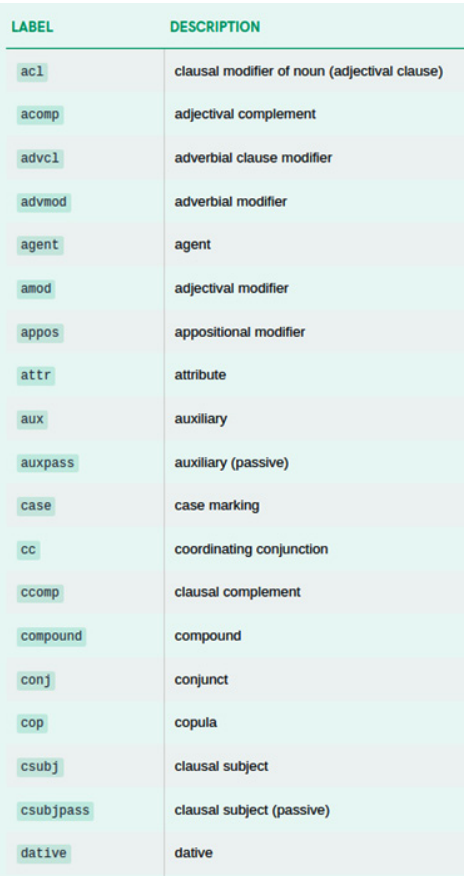

In [22]:
Image('images/dependency_list.PNG')

Vamos primeiro ver uma lista dos rótulos mais comuns e úteis, depois veremos como exatamente eles vinculam os tokens uns aos outros. Aqui está a lista primeiro:
* **amod**: modificador de adjetivo
* **aux**: auxiliar
* **compound**: composto
* **dative**: objeto dativo
* **det**: Determinador
* **dobj**: objeto direto
* **nsubj**: sujeito nominal
* **nsubjpass**: sujeito nominal, passivo
* **nummod**: modificador numérico
* **poss**: modificador possessivo
* **root**: a raiz

Vejamos exemplos de como os rótulos mencionados são usados e que relação eles expressam. **amod** é um modificador de adjetivo. Conforme entendido a partir do nome, essa relação modifica o substantivo (ou pronome). Na captura de tela a seguir, vemos o **white** modifica a **sheep**:

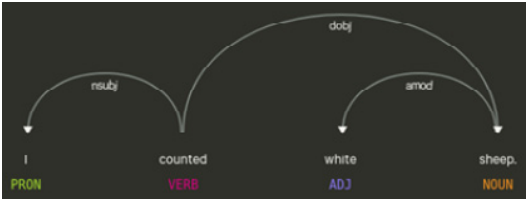

In [23]:
Image('images/amod_relation.PNG')

**aux** é o que você pode imaginar: é a relação de dependência entre um verbo auxiliar e seu verbo principal; o dependente é um verbo auxiliar, e a cabeça é o verbo principal. Na captura de tela a seguir, vemos que **has** é o verbo auxiliar do verbo principal **gone**:

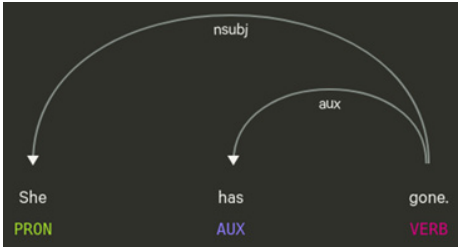

In [24]:
Image('images/aux_relation.PNG')

**compound** é usado para os compostos substantivos; o segundo substantivo é modificado pelo primeiro substantivo. Na captura de tela a seguir, **phone book** é um substantivo composto e o **phone noun** modifica o **book noun**:

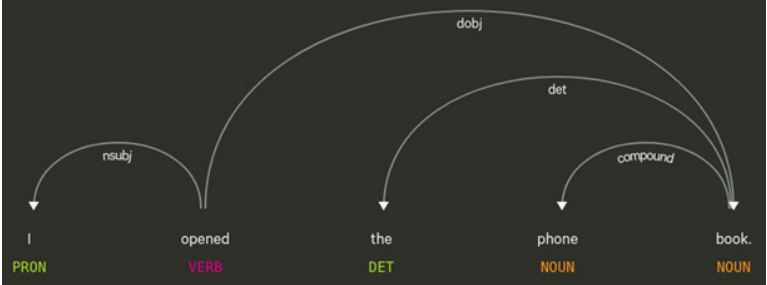

In [26]:
Image('images/compound_relation.PNG')

A relação **det** liga um determinante (o dependente) ao substantivo que qualifica (seu núcleo). Na captura de tela a seguir, **The** é o determinante do substantivo **girl** nesta frase:

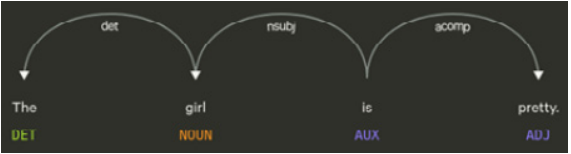

In [27]:
Image('images/det_relation.PNG')

Em seguida, examinamos duas relações de objeto, **dative** e **dobj**. A relação **dobj** é entre o verbo e seu objeto direto. Uma frase pode ter mais de um objeto (como no exemplo a seguir); um objeto direto é o objeto sobre o qual o verbo atua, e os outros são chamados de objetos indiretos.

Um objeto direto é geralmente marcado com **caso acusativo**. Uma relação **dative** aponta para um objeto **dative**, que recebe uma ação indireta do verbo. Na frase mostrada na captura de tela a seguir, o objeto indireto **me** e o objeto direto é o **book**:

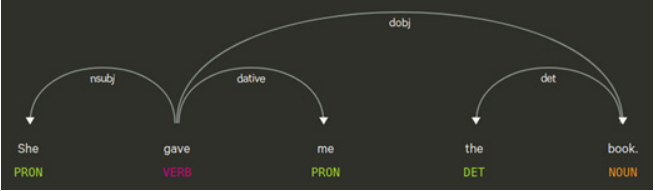

In [28]:
Image('images/object_direct.PNG')

**nsubj** e **nsubjposs** são duas relações que estão relacionadas ao sujeito nominal da sentença. O sujeito da sentença é aquele que cometeu a ação. Um sujeito passivo ainda é o sujeito, mas o marcamos com **nsubjposs**. Na captura de tela a seguir, **Mary** é o sujeito nominal da primeira frase:

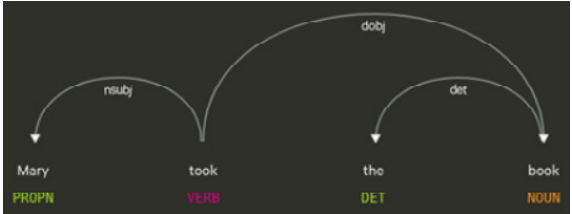

In [30]:
Image('images/nsubj_relation.PNG')

**you** é o sujeito nominal passivo da sentença no seguinte captura de tela:

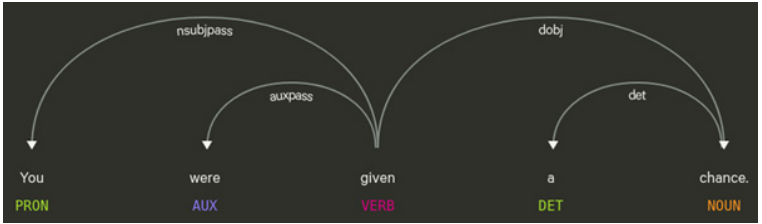

In [31]:
Image('images/nsubjpass_relation.PNG')

Já cobrimos as relações sujeito e objeto da sentença. Agora, descobriremos duas relações de modificadores; um é o **modificador numérico nummod** e o outro é o **modificador possessivo**. Um modificador numérico modifica o significado do substantivo principal por um número/quantidade. Na frase mostrada na captura de tela a seguir, o **nummod** é fácil de identificar; é entre **3** e **books**:

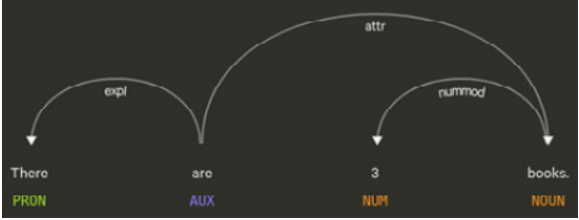

In [32]:
Image('images/nummod_relation.PNG')

Um modificador possessivo acontece entre um pronome possessivo e um substantivo ou um possessivo *'s* e um substantivo. Na frase mostrada na captura de tela a seguir, **my** é um marcador possessivo no substantivo **book**:

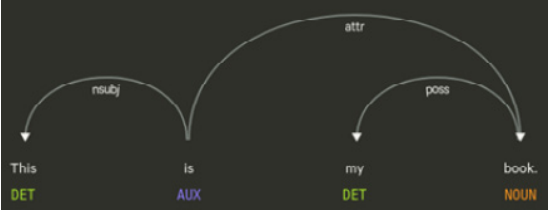

In [34]:
Image('images/poss_relation.PNG')

Por último, mas não menos importante, é o **root label** (rótulo da raiz), que não é uma relação real, mas é um marcador para o verbo da sentença. Uma palavra raiz não tem pai real na árvore sintática; a raiz é o verbo principal da frase. Nas frases anteriores, **took** e **given** são as raízes correspondentes. Os verbos principais de ambas as frases são os verbos auxiliares **is** e **are**. Observe que o nó raiz não tem arco de entrada, ou seja, nenhum pai.

Esses são os rótulos mais úteis para nossos propósitos de NLU. Você definitivamente não precisa memorizar todos os rótulos, pois se familiarizará com a prática nas próximas páginas. Além disso, você pode perguntar ao spaCy sobre um rótulo sempre que precisar, via **spacy.explain()**. O código para fazer isso é mostrado no trecho a seguir:

In [35]:
spacy.explain('nsubj')

'nominal subject'

In [36]:
doc = nlp('I own a ginger cat.')
token = doc[4]
print(f"{token.text} ----- {token.dep_} ---- {spacy.explain(token.dep_)}")

cat ----- dobj ---- direct object


Novamente, **token.dep_** inclui o rótulo de dependência do token dependente. A propriedade **token.head** aponta para o token principal/pai. Apenas o token raiz não possui um pai; spaCy aponta para o próprio token neste caso. Vamos dividir a frase de exemplo da Figura 3.7, como segue:

In [38]:
doc = nlp('I counted white sheep.')
for token in doc:
    print(f"{token.text} ----- {token.pos_} ---- {token.dep_}")

I ----- PRON ---- nsubj
counted ----- VERB ---- ROOT
white ----- ADJ ---- amod
sheep ----- NOUN ---- dobj
. ----- PUNCT ---- punct


Nós iteramos sobre os tokens e imprimimos a tag POS refinada e o rótulo de dependência. **counted** é o verbo principal da frase e é rotulado pelo rótulo **ROOT**. Agora, **I** é o sujeito da frase, e **sheep** é o objeto direto. **white** é um adjetivo e modifica o substantivo **sheep**, por isso seu rótulo é **amod**. Aprofundamos um nível e imprimimos as cabeças de token desta vez, da seguinte forma:

In [39]:
doc = nlp('I counted white sheep.')
for token in doc:
    print(f"{token.text} ----- {token.tag_}----- {token.pos_} ---- {token.dep_}")

I ----- PRP----- PRON ---- nsubj
counted ----- VBD----- VERB ---- ROOT
white ----- JJ----- ADJ ---- amod
sheep ----- NN----- NOUN ---- dobj
. ----- .----- PUNCT ---- punct


In [40]:
from spacy import displacy
displacy.render(doc)

Quando a propriedade **token.head** também está envolvida, é uma boa ideia seguir o código e o visual ao mesmo tempo. Vamos passo a passo para entender como o visual e o código combinam:
1. Começamos a ler a árvore de análise a partir da raiz. É o verbo principal: **counted**.
2. Em seguida, seguimos seu arco à esquerda em direção ao pronome **I**, que é o sujeito nominal da sentença e é rotulado pelo rótulo **nsubj**.
3. Agora, volte para a raiz, **counted**. Desta vez, navegamos para a direita. Siga o arco **dobj** para chegar ao substantivo **sheep**. **sheep** é modificado pelo adjetivo **white** com uma relação **amod**, portanto o objeto direto desta frase é **white sheep**.

Mesmo uma frase tão simples e plana tem uma árvore de análise de dependência que é chique de ler, certo? Não se apresse — você vai se acostumar praticando. Vamos examinar a árvore de dependência de uma frase mais longa e complicada, como segue:

In [41]:
doc = nlp("We are trying to understand the difference.")
for token in doc:
    print(f"{token.text} ----- {token.tag_}----- {token.pos_} ---- {token.head}")

We ----- PRP----- PRON ---- trying
are ----- VBP----- AUX ---- trying
trying ----- VBG----- VERB ---- trying
to ----- TO----- PART ---- understand
understand ----- VB----- VERB ---- trying
the ----- DT----- DET ---- difference
difference ----- NN----- NOUN ---- understand
. ----- .----- PUNCT ---- trying


Agora, desta vez as coisas parecem um pouco diferentes, como veremos na a seguir. Localizamos o verbo principal e a raiz **trying** (não tem arcos de entrada). O lado esquerdo da palavra **trying** parece administrável, mas o lado direito tem uma cadeia de arcos. Vamos começar pelo lado esquerdo. O pronome **we** é rotulado por **nsubj**, portanto, este é o sujeito nominal da sentença. O outro arco da esquerda, rotulado como **aux**, aponta para o **trying** dependente **are**, que é o verbo auxiliar do verbo principal **trying**.

Até agora tudo bem. Agora, o que está acontecendo no lado direito? **trying** é anexado ao segundo verbo entender por meio de uma relação **xcomp**. A relação **xcomp** (ou complemento aberto) de um verbo é uma oração sem sujeito próprio. Aqui, a cláusula para **to understand the difference** não tem sujeito, então é um complemento aberto. Seguimos o arco **dobj** do segundo verbo, **understand**, e pousamos no substantivo, **difference**, que é o objeto direto do **to understand the difference**, e este é o resultado:

In [42]:
from spacy import displacy
displacy.render(doc)

Esta foi uma análise aprofundada para esta frase de exemplo, que de fato não parece tão complicada. Em seguida, processamos uma sentença com uma subsentença que possui seu próprio sujeito nominal, como segue:

In [43]:
doc = nlp("Queen Katherine, who was the mother of Mary Tudor, died at 1536.")
for token in doc:
    print(f"{token.text} ----- {token.tag_}----- {token.pos_} ---- {token.head}")

Queen ----- NNP----- PROPN ---- Katherine
Katherine ----- NNP----- PROPN ---- died
, ----- ,----- PUNCT ---- Katherine
who ----- WP----- PRON ---- was
was ----- VBD----- AUX ---- Katherine
the ----- DT----- DET ---- mother
mother ----- NN----- NOUN ---- was
of ----- IN----- ADP ---- mother
Mary ----- NNP----- PROPN ---- Tudor
Tudor ----- NNP----- PROPN ---- of
, ----- ,----- PUNCT ---- Katherine
died ----- VBD----- VERB ---- died
at ----- IN----- ADP ---- died
1536 ----- CD----- NUM ---- at
. ----- .----- PUNCT ---- died


Para tornar os visuais grandes o suficiente, dividi a visualização em duas partes. Primeiro, vamos encontrar a raiz. A raiz está na parte direita. **died** é a frase principal do verbo e a raiz (novamente, não tem arcos de entrada). O resto do lado direito não contém nada complicado.

Por outro lado, o lado esquerdo tem algumas coisas interessantes - na verdade, uma cláusula relativa. Vamos dividir a estrutura da cláusula relativa:
* Começamos com o nome próprio **Katherine**, que está ligado a **died** com uma relação **nsubj**, daí o sujeito da frase.
* Vemos um arco composto saindo de **Katherine** em direção ao nome próprio, **Queen**. Aqui, **Quenn** é um título, então o relacionamento com **Katherine** é composto. A mesma relação existe entre **Mary** e **Tudor** no lado direito, e os sobrenomes e nomes também estão ligados à relação composta.

É hora de dividir a cláusula relativa, **who was the mother of Mary Tudor**, da seguinte forma:

* Em primeiro lugar, é **Katherine** que é mencionada na cláusula relativa, então vemos um arco **relcl** (cláusula relativa) de **Katherine** para **was** da cláusula relativa.
* **who** é o sujeito nominal da oração e está ligado a **was** por meio de uma relação **nsubj**. Como você vê na captura de tela a seguir, a árvore de dependências é diferente da frase do exemplo anterior, cuja cláusula não possuía um assunto nominal:

In [44]:
from spacy import displacy
displacy.render(doc)

É perfeitamente normal se você sentir que não será capaz de manter todas as relações em sua mente. Não se preocupe - sempre encontre a raiz/verbo principal da frase, depois siga os arcos da raiz e vá mais fundo, assim como fizemos anteriormente. Você sempre pode dar uma olhada na documentação spaCy (https://spacy.io/api/annotation#dependency-parsing) para ver o que o tipo de relação significa. Leve o seu tempo até que você se acostume com o conceito e os detalhes.

A demonstração on-line do displaCy é uma ótima ferramenta, portanto, não tenha vergonha de experimentar suas próprias frases de exemplo e ver os resultados da análise. É perfeitamente normal você achar esta seção pesada. No entanto, esta seção é uma base sólida para a linguística geral e também para os exercícios de extração de informações e correspondência de padrões no Capítulo 4, Correspondência Baseada em Regras. Você ficará ainda mais confortável depois de passar por um estudo de caso no Capítulo 6, Juntando tudo: análise semântica com espaço. Dê a si mesmo tempo para digerir a análise de dependência com exemplos ao longo do livro.

O que vem depois do analisador de dependência? Sem dúvida, você já deve ter ouvido o NER ser mencionado com frequência no mundo NLU. Vamos olhar para este conceito NLU muito importante.

## Apresentando o NER

Abrimos este capítulo com um tagger e veremos outro tagger muito útil - o tagger NER de spaCy. Como o nome do NER sugere, estamos interessados em encontrar entidades nomeadas.
O que é uma **entidade nomeada**? Uma entidade nomeada é um objeto do mundo real ao qual podemos nos referir por um nome próprio ou uma quantidade de interesse. Pode ser uma pessoa, um lugar (cidade, país, ponto de referência, prédio famoso), uma organização, uma empresa, um produto, datas, horários, porcentagens, valores monetários, um medicamento ou o nome de uma doença. Alguns exemplos são Alicia Keys, Paris, França, Portão de Brandemburgo, OMS, Google, Porsche Cayenne e assim por diante.

Uma entidade nomeada sempre aponta para um objeto específico, e esse objeto é distinguível por meio da entidade nomeada correspondente. Por exemplo, se marcarmos a frase Paris é a capital da França, analisaremos Paris e França como entidades nomeadas, mas não a palavra capital. A razão é que o capital não aponta para um objeto específico; é um nome geral para muitos objetos.

A categorização NER é um pouco diferente da categorização POS. Aqui, o número de categorias é tão alto quanto queremos. As categorias mais comuns são pessoa, localização e organização e são suportadas por quase todos os taggers NER utilizáveis. Na captura de tela a seguir, vemos as tags correspondentes:

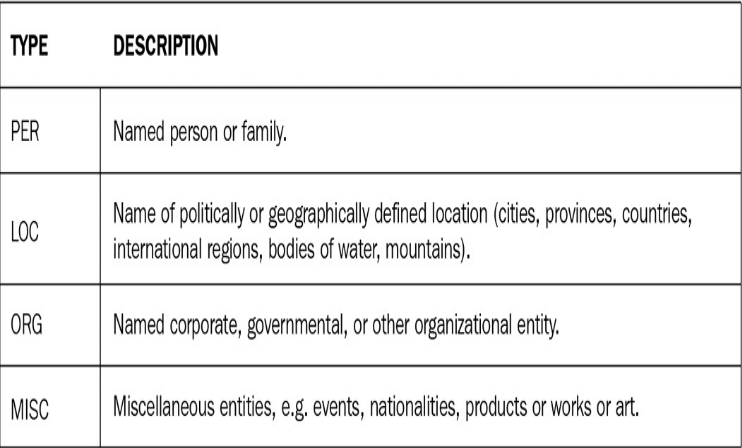

In [45]:
Image('images/entity_types.PNG')

spaCy oferece suporte a uma ampla variedade de tipos de entidade. Quais deles você usa depende do seu corpus. Se você processa texto financeiro, provavelmente usa **MONEY** e **PERCENTAGE** com mais frequência do que **WORK_OF_ART**. Aqui está uma lista dos tipos de entidade suportados pelo spaCy:

<img src="https://miro.medium.com/max/511/0*SqZbOvfNIdPsuVh3.png">

Assim como os modelos estatísticos de tagger POS, os modelos NER também são modelos sequenciais. O primeiro modelo moderno de tagger NER é um **campo aleatório condicional (CRF)**. CRFs são classificadores de sequência usados para problemas de previsão estruturados, como rotulagem e análise sintática. Se você quiser saber mais sobre os detalhes da implementação do CRF, leia mais neste recurso: https://homepages.inf.ed.ac.uk/csutton/publications/crftutv2.pdf.

A marcação NER de última geração é alcançada por modelos de redes neurais, geralmente arquiteturas LSTM ou LSTM+CRF. Entidades nomeadas em um documento estão disponíveis por meio da propriedade **doc.ents**.  **doc.ents** é uma lista de objetos **Span**, conforme ilustrado no trecho de código a seguir:

In [46]:
doc = nlp("The president Donald Trump visited France.")
doc.ents

(Donald Trump, France)

In [47]:
type(doc.ents[1])

spacy.tokens.span.Span

spaCy também marca cada token com o tipo de entidade. O tipo da entidade nomeada está disponível via **token.ent_type(int)** e **token.ent_type_(unicode)**. Se o token não for uma entidade nomeada, **token.ent_type_** será apenas uma string vazia.

Assim como para tags POS e rótulos de dependência, podemos chamar **spacy.explain()** na string da tag ou no **token.ent_type_**, da seguinte forma:

In [48]:
spacy.explain('ORG')

'Companies, agencies, institutions, etc.'

In [53]:
doc = nlp("He worked for NASA.")
token = doc[3]
print(f"{token.ent_type_} ---> {spacy.explain(token.ent_type_)}")

ORG ---> Companies, agencies, institutions, etc.


Vamos ver alguns exemplos para ver o tagger spaCy NER em ação, como segue:

In [54]:
doc = nlp("Albert Einstein was born in Ulm on 1879. He studied electronical engineering at ETH Zurich.")
doc.ents

(Albert Einstein, Ulm, 1879, ETH Zurich)

In [57]:
for token in doc:
    print(f"{token.text}====={token.ent_type_ or None} ---> {spacy.explain(token.ent_type_)}")

Albert=====PERSON ---> People, including fictional
Einstein=====PERSON ---> People, including fictional
was=====None ---> None
born=====None ---> None
in=====None ---> None
Ulm=====GPE ---> Countries, cities, states
on=====None ---> None
1879=====DATE ---> Absolute or relative dates or periods
.=====None ---> None
He=====None ---> None
studied=====None ---> None
electronical=====None ---> None
engineering=====None ---> None
at=====None ---> None
ETH=====ORG ---> Companies, agencies, institutions, etc.
Zurich=====ORG ---> Companies, agencies, institutions, etc.
.=====None ---> None


D:\WILLIAN\Anaconda3\envs\lib\site-packages\spacy\glossary.py:19: UserWarning: [W118] Term '' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


Nós iteramos os tokens um por um e imprimimos o token e seu tipo de entidade. Se o token não estiver marcado como uma entidade, então **token.ent_type_** é apenas uma string vazia, portanto, não há explicação de **spacy.explain()**. Para os tokens que fazem parte de um NE, uma tag apropriada é retornada. Nas frases anteriores, **Albert Einstein**, **Ulm**, **1879** e **ETH Zurich** estão corretamente marcados como **PERSON**, **GPE**, **DATE** e **ORG**, respectivamente. Vamos ver uma frase mais longa e complicada com uma entidade não inglesa e ver como spaCy a marcou, da seguinte forma:

In [58]:
doc = nlp("Jean-Michel Basquiat was an American artist of Haitian and Puerto Rican descent who gained fame with his graffiti and street art work")
doc.ents

(Jean-Michel Basquiat, American, Haitian, Puerto Rican)

In [59]:
for ent in doc.ents:
    print(f"{ent}====={ent.label_} ---> {spacy.explain(ent.label_)}")

Jean-Michel Basquiat=====PERSON ---> People, including fictional
American=====NORP ---> Nationalities or religious or political groups
Haitian=====GPE ---> Countries, cities, states
Puerto Rican=====NORP ---> Nationalities or religious or political groups


Parece bom! O tagger spaCy pegou uma entidade pessoa com um - sem problemas. No geral, o tagger funciona muito bem para diferentes tipos de entidade, como vimos ao longo dos exemplos.

Depois de marcar tokens com diferentes recursos sintáticos, às vezes queremos mesclar/dividir entidades em menos/mais tokens. Na próxima seção, veremos como a fusão e a divisão são feitas. Antes disso, veremos uma aplicação real da marcação NER.